Train shape: (60000, 28, 28) Train labels: (60000,)
Test shape: (10000, 28, 28) Test labels: (10000,)


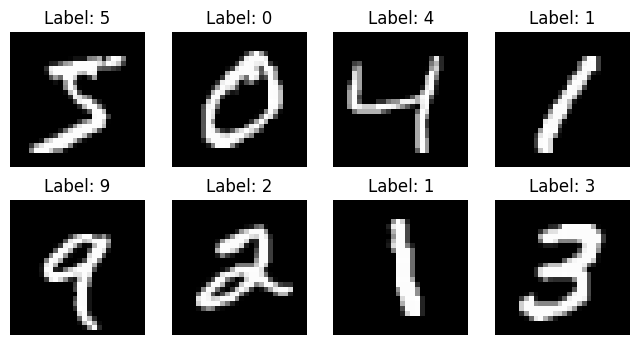

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
422/422 - 3s - loss: 0.4703 - accurac

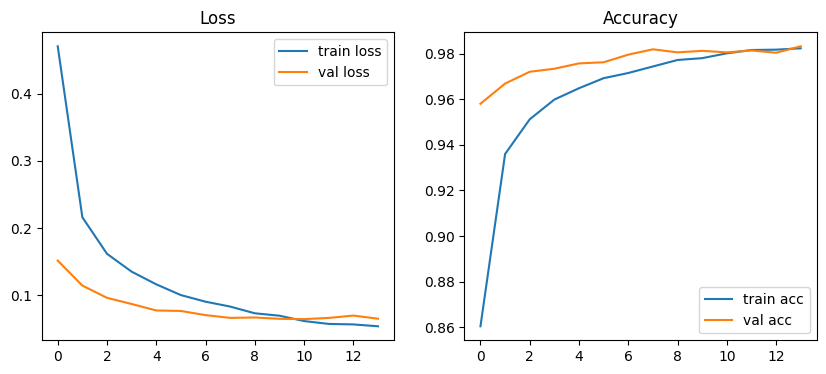

313/313 [==============================] - 1s 3ms/step


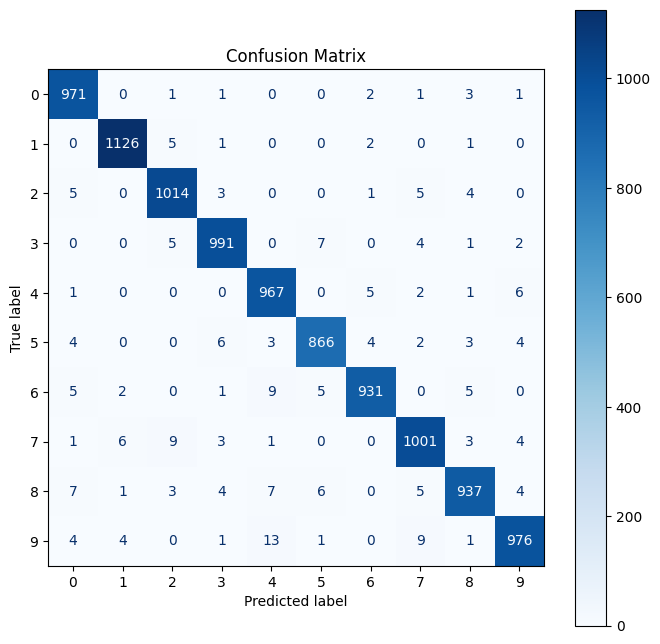

Classification Report:
              precision    recall  f1-score   support

           0     0.9729    0.9908    0.9818       980
           1     0.9886    0.9921    0.9903      1135
           2     0.9778    0.9826    0.9802      1032
           3     0.9802    0.9812    0.9807      1010
           4     0.9670    0.9847    0.9758       982
           5     0.9785    0.9709    0.9747       892
           6     0.9852    0.9718    0.9785       958
           7     0.9728    0.9737    0.9733      1028
           8     0.9771    0.9620    0.9695       974
           9     0.9789    0.9673    0.9731      1009

    accuracy                         0.9780     10000
   macro avg     0.9779    0.9777    0.9778     10000
weighted avg     0.9780    0.9780    0.9780     10000



In [2]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


import os
import random
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("Train shape:", x_train.shape, "Train labels:", y_train.shape)
print("Test shape:", x_test.shape, "Test labels:", y_test.shape)


plt.figure(figsize=(8,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0


x_train_flat = x_train.reshape((-1, 28*28))
x_test_flat  = x_test.reshape((-1, 28*28))


model = keras.Sequential([
    layers.Input(shape=(28*28,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']
)


callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
]

history = model.fit(
    x_train_flat, y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=128,
    callbacks=callbacks,
    verbose=2
)


test_loss, test_acc = model.evaluate(x_test_flat, y_test, verbose=0)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()


y_pred_proba = model.predict(x_test_flat)
y_pred = np.argmax(y_pred_proba, axis=1)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=np.arange(10))
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))


def show_examples(indices, title):
    plt.figure(figsize=(10,3))
    for i, idx in enumerate(indices[:10]):
        plt.subplot(2,5,i+1)
        plt.imshow(x_test[idx], cmap='gray')
        plt.title(f"true:{y_test[idx]}\npred:{y_pred[idx]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

